In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent

In [14]:
f = lambda w: (w[0]**2 + w[1] - 11)**2 + (w[0] + w[1]**2 - 7)**2
# used to numerically computer grad(f) based on 2 points +- grad_diff in each direction
epsilon = 1e-12
grad_diff = 100*epsilon
max_iter = 10000

In [45]:
def grad_descent(w_init, step_size):
    path = [w_init]
    w = w_init
    diff_0 = np.array([grad_diff, 0])
    diff_1 = np.array([0, grad_diff])
    for i in range(max_iter):
        grad_0 = (f(w + diff_0) - f(w - diff_0))
        grad_1 = (f(w + diff_1) - f(w - diff_1)) 
        grad = np.array([grad_0, grad_1]) / (2*grad_diff)
        w = np.add(w, -step_size*grad)
        path.append(w)
        if np.linalg.norm(grad) < epsilon:
            break
    return w, path


In [46]:
# 1
w0 = np.array([0, -4])
for step_size in [5e-3, 1e-2]:
    w, path = grad_descent(w0, step_size)
    print('With w0 =', w0, 'and step_size=', step_size)
    print('Minimum w* =', w, 'found in', len(path)-1, 'iterations')

With w0 = [ 0 -4] and step_size= 0.005
Minimum w* = [-3.77931025 -3.28318599] found in 94 iterations
With w0 = [ 0 -4] and step_size= 0.01
Minimum w* = [-3.77931025 -3.28318599] found in 39 iterations


In [ ]:
# Comments
# The convergence speed is higher with a larger step size
# Since the value of w is updated by a larger amount in each step

In [59]:
# 2a
step_size = 1e-2
init_values = [np.array([0, -4]),
               np.array([0.5, -4]),
               np.array([0, 4]),
               np.array([0.5, 4])]
paths = []
for w0 in init_values:
    w, path = grad_descent(w0, step_size)
    paths.append(path)
    print('With w0 =', w0, 'and step_size=', step_size)
    print('Minimum w* =', w, 'found in', len(path)-1, 'iterations')

With w0 = [ 0 -4] and step_size= 0.01
Minimum w* = [-3.77931025 -3.28318599] found in 39 iterations
With w0 = [ 0.5 -4. ] and step_size= 0.01
Minimum w* = [ 3.58442834 -1.84812653] found in 92 iterations
With w0 = [0 4] and step_size= 0.01
Minimum w* = [-2.80511809  3.13131252] found in 42 iterations
With w0 = [ 0.5  4. ] and step_size= 0.01
Minimum w* = [ 3.  2.] found in 112 iterations


The solutions are not all the same, but they actually evaluate to approximately the same value of the function, close to 0. In this case, they are global minima, but just knowing that they are different results of running gradient descent, they could be local minima.

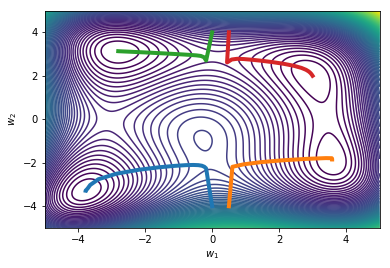

In [61]:
# 2b
grid_vals = np.linspace(-5, 5, 1000)
zvals = []
for y in grid_vals:
    zvals.append([f([x, y]) for x in grid_vals])
zvals = np.array(zvals)
plt.contour(grid_vals, grid_vals, zvals, 100)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
for path in paths:
    plt.plot([point[0] for point in path], [point[1] for point in path], linewidth=4)
plt.show()

# Parameter Estimation

In [64]:
from scipy.stats import multivariate_normal

Sample mean for N = 10 is:
[-0.73062298 -0.56321272  3.5247627   1.1043929   0.74343888]
Instantaneous error: 0.685783408837

Sample mean for N = 100 is:
[-0.78675125  0.0252658   4.17853682  0.99468012  0.62654562]
Instantaneous error: 0.0940308822854

Sample mean for N = 1000 is:
[-0.97614758  0.05424621  4.00603806  1.05301189  0.47847427]
Instantaneous error: 0.00682166519678

Sample mean for N = 10000 is:
[ -1.00858803e+00  -3.44370704e-04   3.99738806e+00   9.93583453e-01
   5.12339024e-01]
Instantaneous error: 0.000274118724176

Sample mean for N = 100000 is:
[-0.99987729 -0.00716902  3.99355626  0.99462181  0.50264422]
Instantaneous error: 0.000128848428125

Sample mean for N = 1000000 is:
[ -1.00116011e+00   6.27976596e-04   4.00177205e+00   1.00066475e+00
   4.99114244e-01]
Instantaneous error: 6.10684014916e-06



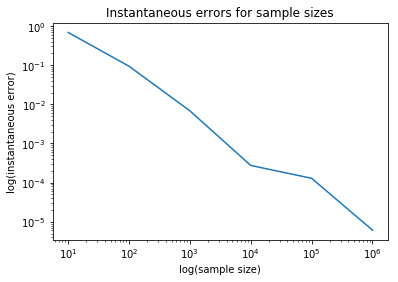

In [75]:
mu = np.array([-1, 0, 4, 1, 0.5])
cov = 2*np.eye(5)
Nvals = [10**i for i in range(1,7)]
inst_errors = []
for N in Nvals:
    Xmat = multivariate_normal.rvs(mean=mu, cov=cov, size=N)
    samp_mean = np.sum(Xmat, axis=0)/N
    print('Sample mean for N =', N, 'is:')
    print(samp_mean)
    en = np.linalg.norm(mu - samp_mean)**2
    inst_errors.append(en)
    print('Instantaneous error:', en)
    print()

plt.loglog(Nvals, inst_errors)
plt.title('Instantaneous errors for sample sizes')
plt.xlabel('log(sample size)')
plt.ylabel('log(instantaneous error)')
plt.show()

As the sample size increases, the instantaneous error decreases (the relationship between the log of error and log of size appears close to linear). This follows the Law of Large Numbers, since a larger number of samples has a mean closer to the expected value of the samples.